<a href="https://colab.research.google.com/github/meriemdouider1/pfe/blob/main/smote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import numpy 
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import StratifiedKFold

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [4]:
Clt = '/content/Classeurbb.xlsx'
data= pd.read_excel(Clt,
sheet_name=0,
header=0,
index_col=False,
keep_default_na=True)

In [5]:
data

,Source,CodeSite,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,Bennouna,Z01-S01-G01,-15.911420,23.794740,0,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,Bennouna,Z01-S05-G01,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,Bennouna,Z01-S05-G02,-13.188370,27.132950,0,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,Bennouna,Z01-S07-G01,-13.185620,27.157940,1,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,Bennouna,Z01-S08-G01,-13.167180,27.157730,0,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Trari,Trari_265,-5.283333,35.633333,1,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,Trari,Trari_267,-5.325286,35.685852,1,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.

In [7]:
del data["Source"]
del data["CodeSite"]
data.head()

,X_long,Y_lat,Cx_theileri,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.91142,23.79474,0,0.000000,0.0,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.18837,27.13295,0,0.000214,0.0,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.18562,27.15794,1,0.000000,0.0,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.16718,27.15773,0,0.000000,0.0,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8


In [8]:
(data[data["Cx_theileri"]==0]).count

<bound method DataFrame.count of        X_long     Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
0   -15.91142  23.79474            0  ...       5.4       5.5       4.9
1   -13.18837  27.13295            0  ...       4.3       3.7       3.8
2   -13.18837  27.13295            0  ...       4.3       3.7       3.8
4   -13.16718  27.15773            0  ...       4.2       3.6       3.8
5   -13.20156  27.16507            0  ...       4.6       3.8       3.9
..        ...       ...          ...  ...       ...       ...       ...
160  -6.00400  30.45600            0  ...       2.7       3.0       2.8
162  -6.23900  30.69500            0  ...       2.7       3.0       3.2
163  -6.91000  30.91300            0  ...       2.7       2.9       2.8
164  -6.86400  30.86600            0  ...       3.4       3.4       3.6
166  -5.00000  31.52220            0  ...       3.4       2.8       3.0

[114 rows x 226 columns]>

In [9]:
(data[data["Cx_theileri"]==1]).count

<bound method DataFrame.count of         X_long      Y_lat  Cx_theileri  ...  Vent_Oct  Vent_Nov  Vent_Dec
3   -13.185620  27.157940            1  ...       4.1       3.7       3.9
7   -13.207000  27.166000            1  ...       4.6       3.8       3.9
11  -13.214230  27.166700            1  ...       4.4       3.6       3.8
15  -10.227900  28.971600            1  ...       3.6       3.3       3.7
18  -10.585830  28.973590            1  ...       3.1       3.4       3.7
..         ...        ...          ...  ...       ...       ...       ...
296  -5.283333  35.633333            1  ...       3.9       3.4       3.8
297  -5.325286  35.685852            1  ...       4.0       3.9       4.3
298  -5.833954  35.759465            1  ...       3.5       3.8       3.9
299  -5.366667  35.766667            1  ...       4.0       4.0       4.2
300  -5.816667  35.783333            1  ...       3.6       3.8       4.0

[187 rows x 226 columns]>

In [10]:
X = data.loc[:, data.columns != 'Cx_theileri']
y = data.Cx_theileri

In [11]:
X

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0,97,3,0,0,0,0,0,0,0,0,3340,570,110,50,47,2,0,49,2690,3950,566,160,231,0,14905,96,83,7,30,23,0,53,...,26.500000,26.000000,24.500000,22.500000,14.5,14.8,15.7,15.6,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.2,1.31,1.44,1.55,1.63,1.72,1.91,2.07,2.18,2.16,2.02,1.71,1.47,4.8,5.6,6.1,6.9,7.2,7.1,7.5,7.2,6.3,5.4,5.5,4.9
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0,100,0,0,0,0,0,0,0,0,0,4010,660,10,50,73,0,0,73,3350,4660,581,33,49,0,15360,312,126,31,74,12,1,87,...,29.200001,27.600000,25.100000,22.600000,12.0,12.8,14.2,14.7,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.8,1.18,1.32,1.42,1.50,1.62,1.84,2.03,2.10,2.09,1.95,1.60,1.39,4.2,4.1,4.8,5.6,5.7,6.4,5.9,5.9,5.7,4.3,3.7,3.8
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0,100,0,0,0,0,0,0,0,0,0,3580,590,40,50,48,0,0,48,2930,4140,600,214,106,0,15264,306,120,23,74,11,0,85,...,29.200001,27.600000,25.100000,22.700001,12.3,13.1,14.4,15.0,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.1,1.19,1.33,1.43,1.52,1.64,1.86,2.04,2.12,2.10,1.97,1.61,1.40,4.2,4.5,5.1,5.6,5.5,6.2,6.2,6.2,5.7,4.1,3.7,3.9
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0,100,0,0,0,0,0,0,0,0,0,3000,590,70,10,18,0,0,18,2350,3540,577,185,64,10,15310,295,115,33,66,10,1,77,...,29.400000,27.799999,25.299999,22.900000,12.4,13.2,14.6,15.2,16.100000,17.700001,19.100000,20.200001,19.700001,18.200001,15.600000,13.2,1.20,1.34,1.44,1.53,1.65,1.88,2.07,2.14,2.13,1.99,1.63,1.41,4.2,4.2,5.0,5.2,5.4,5.7,6.2,5.8,5.6,4.2,3.6,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,-5.283333,35.633333,0.000000,0.000000,0.000000,0.000000,0.576012,0,0,3,0,0,0,0,0,0,0,97,1310,460,10,30,74,0,0,74,890,1730,637,551,11,0,0,0,0,0,0,0,0,0,...,26.000000,22.900000,19.500000,17.100000,9.2,9.8,11.3,12.8,15.100000,18.299999,21.000000,21.600000,19.700001,16.600000,13.300000,10.8,1.12,1.18,1.24,1.32,1.54,1.82,2.06,2.17,2.02,1.71,1.39,1.23,3.7,4.1,4.6,4.2,4.1,4.1,4.0,3.8,3.9,3.9,3.4,3.8
297,-5.325286,35.685852,7.352805,115.615433,7.495493,18.920124,0.577831,0,21,1,25,0,0,0,0,25,0,28,1940,730,50,20,87,0,0,87,1290,2690,625,45,50,0,14891,543,68,7,92,1,0,93,...,25.700001,22.400000,19.100000,16.400000,9.7,10.5,12.0,13.5,15.800000,18.600000,21.500000,22.000000,20.200001,16.900000,13.600000,10.9,1.12,1.17,1.24,1.32,1.53,1.81,2.05,2.16,2.01,1.71,1.39,1.22,4.0,4.6,4.5,4.2,4.2,4.1,4.0,4.1,4.0,4.0,3.9,4.3
298,-5.833954,35.

In [12]:
y

0      0
1      0
2      0
3      1
4      0
      ..
296    1
297    1
298    1
299    1
300    1
Name: Cx_theileri, Length: 301, dtype: int64

In [16]:
COLUM=X.columns

In [17]:
COLUM

Index(['X_long', 'Y_lat', 'Bovins', 'Volaille', 'Caprins', 'Ovins', 'Equides',
       'Coniferes', 'ZoneAride', 'ZonePel',
       ...
       'Vent_Mars', 'Vent_Avril', 'Vent_Mai', 'Vent_Juin', 'Vent_Juill',
       'Vent_Aout', 'Vent_Sept', 'Vent_Oct', 'Vent_Nov', 'Vent_Dec'],
      dtype='object', length=225)



*   Smote



In [14]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
X1

array([[-1.59114200e+01,  2.37947400e+01,  0.00000000e+00, ...,
         5.40000010e+00,  5.50000000e+00,  4.90000010e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       [-1.31883700e+01,  2.71329500e+01,  2.14420957e-04, ...,
         4.30000019e+00,  3.70000005e+00,  3.79999995e+00],
       ...,
       [-1.32021723e+01,  2.71509634e+01,  9.99779325e-05, ...,
         4.35337320e+00,  3.64662691e+00,  3.79999995e+00],
       [-6.31557750e+00,  3.39689010e+01,  0.00000000e+00, ...,
         2.79669489e+00,  2.83057905e+00,  2.83057905e+00],
       [-1.32107802e+01,  2.71621976e+01,  2.86047720e-05, ...,
         4.38665963e+00,  3.61334040e+00,  3.79999995e+00]])

In [18]:
import pandas as pd
var = pd.DataFrame(X1,
               columns =COLUM)
var

,X_long,Y_lat,Bovins,Volaille,Caprins,Ovins,Equides,Coniferes,ZoneAride,ZonePel,Lesfeuillus,Caduc,Autres,Arbrisseau,Pl_herb,VegCul,VegInond,ZoneUrbaine,Moy_IRM,Amp1_IRM,Amp2_IRM,Amp3_IRM,VarT_ann_IRM,VarT_bi_IRM,VarT_tri_IRM,VarT_Cy_IRM,Min_IRM,Max_IRM,Ph1_IRM,Ph2_IRM,Ph3_IRM,Var_IRM,Moy_TempJ,Amp1_TempJ,Amp2_TempJ,Amp3_TempJ,VarT_ann_TempJ,VarT_bi_TempJ,VarT_tri_TempJ,VarT_cy_TempJ,...,Tmax_Sept,Tmax_Oct,Tmax_Nov,Tmax_Dec,Tmin_Janv,Tmin_Fev,Tmin_Mars,Tmin_Avril,Tmin_Mai,Tmin_Juin,Tmin_Juill,Tmin_Aout,Tmin_Sept,Tmin_Oct,Tmin_Nov,Tmin_Dec,Vap_Janv,Vap_Fev,Vap_Mars,Vap_Avril,Vap_Mai,Vap_Juin,Vap_Juill,Vap_Aout,Vap_Sept,Vap_Oct,Vap_Nov,Vap_Dec,Vent_Janv,Vent_Fev,Vent_Mars,Vent_Avril,Vent_Mai,Vent_Juin,Vent_Juill,Vent_Aout,Vent_Sept,Vent_Oct,Vent_Nov,Vent_Dec
0,-15.911420,23.794740,0.000000,0.000000,0.000000,0.000000,0.624435,0.0,97.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3340.000000,570.000000,110.000000,50.000000,47.000000,2.000000,0.000000,49.000000,2690.000000,3950.000000,566.000000,160.000000,231.000000,0.0,14905.000000,96.000000,83.000000,7.000000,30.000000,23.000000,0.0,53.000000,...,26.500000,26.000000,24.500000,22.500000,14.500000,14.800000,15.700000,15.600000,16.200001,17.299999,18.000000,18.900000,19.200001,18.799999,17.299999,15.200000,1.310000,1.440000,1.550000,1.630000,1.720000,1.910000,2.070000,2.180000,2.160000,2.020000,1.710000,1.470000,4.800000,5.600000,6.100000,6.900000,7.200000,7.100000,7.500000,7.200000,6.300000,5.400000,5.500000,4.900000
1,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0.0,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4010.000000,660.000000,10.000000,50.000000,73.000000,0.000000,0.000000,73.000000,3350.000000,4660.000000,581.000000,33.000000,49.000000,0.0,15360.000000,312.000000,126.000000,31.000000,74.000000,12.000000,1.0,87.000000,...,29.200001,27.600000,25.100000,22.600000,12.000000,12.800000,14.200000,14.700000,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.800000,1.180000,1.320000,1.420000,1.500000,1.620000,1.840000,2.030000,2.100000,2.090000,1.950000,1.600000,1.390000,4.200000,4.100000,4.800000,5.600000,5.700000,6.400000,5.900000,5.900000,5.700000,4.300000,3.700000,3.800000
2,-13.188370,27.132950,0.000214,0.000000,0.063449,0.034352,0.040295,0.0,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,4010.000000,660.000000,10.000000,50.000000,73.000000,0.000000,0.000000,73.000000,3350.000000,4660.000000,581.000000,33.000000,49.000000,0.0,15360.000000,312.000000,126.000000,31.000000,74.000000,12.000000,1.0,87.000000,...,29.200001,27.600000,25.100000,22.600000,12.000000,12.800000,14.200000,14.700000,15.700000,17.299999,18.799999,19.900000,19.400000,17.799999,15.300000,12.800000,1.180000,1.320000,1.420000,1.500000,1.620000,1.840000,2.030000,2.100000,2.090000,1.950000,1.600000,1.390000,4.200000,4.100000,4.800000,5.600000,5.700000,6.400000,5.900000,5.900000,5.700000,4.300000,3.700000,3.800000
3,-13.185620,27.157940,0.000000,0.000000,0.000000,0.000000,0.269410,0.0,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3580.000000,590.000000,40.000000,50.000000,48.000000,0.000000,0.000000,48.000000,2930.000000,4140.000000,600.000000,214.000000,106.000000,0.0,15264.000000,306.000000,120.000000,23.000000,74.000000,11.000000,0.0,85.000000,...,29.200001,27.600000,25.100000,22.700001,12.300000,13.100000,14.400000,15.000000,16.000000,17.600000,19.000000,20.200001,19.600000,18.100000,15.500000,13.100000,1.190000,1.330000,1.430000,1.520000,1.640000,1.860000,2.040000,2.120000,2.100000,1.970000,1.610000,1.400000,4.200000,4.500000,5.100000,5.600000,5.500000,6.200000,6.200000,6.200000,5.700000,4.100000,3.700000,3.900000
4,-13.167180,27.157730,0.000000,0.000000,0.000000,0.000000,0.379107,0.0,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3000.000000,590.000000,70.000000,10.000000,18.000000,0.000000,0.000

In [21]:
import pandas as pd
tar = pd.DataFrame(y1,
               columns =["Cx_theileri"])
tar

,Cx_theileri
0,0
1,0
2,0
3,1
4,0
...,...
369,0
370,0
371,0
372,0


In [22]:
(tar[tar["Cx_theileri"]==0]).count

<bound method DataFrame.count of      Cx_theileri
0              0
1              0
2              0
4              0
5              0
..           ...
369            0
370            0
371            0
372            0
373            0

[187 rows x 1 columns]>

In [23]:
(tar[tar["Cx_theileri"]==1]).count

<bound method DataFrame.count of      Cx_theileri
3              1
7              1
11             1
15             1
18             1
..           ...
296            1
297            1
298            1
299            1
300            1

[187 rows x 1 columns]>

In [33]:
var.to_excel("varth.xlsx")
tar.to_excel("tarth.xlsx")

In [26]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score

XGBClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

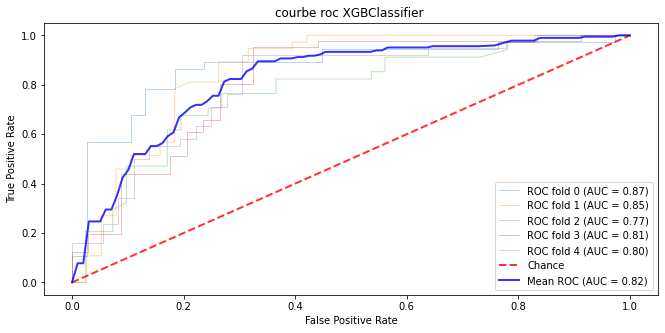

Accuracy: [0.8        0.8        0.72       0.77333333 0.81081081]
moy_accuracy: 0.78
precision: [0.80555556 0.78947368 0.66666667 0.78571429 0.76086957]
moy_precision: 0.76
sensibilité : [0.78378378 0.81081081 0.76470588 0.80487805 0.92105263]
moy_sensibilité: 0.82
spécificité : [0.81578947 0.78947368 0.68292683 0.73529412 0.69444444]
moy_spécificité: 0.74
MCC : [0.60000015 0.6002845  0.44603573 0.54172886 0.63432395]
MCC: 0.56
MCC : [0.60000015 0.6002845  0.44603573 0.54172886 0.63432395]
MCC: 0.56
balanced_accuracy : [0.79978663 0.80014225 0.72381636 0.77008608 0.80774854]
balanced_accuracy: 0.78
roc_auc : [0.86984353 0.85384068 0.77223816 0.81276901 0.80336257]
roc_auc: 0.82
cohen_kappa_scorec : [0.59978655 0.6000711  0.44208289 0.54153182 0.61911765]
cohen_kappa_scorec: 0.56
LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

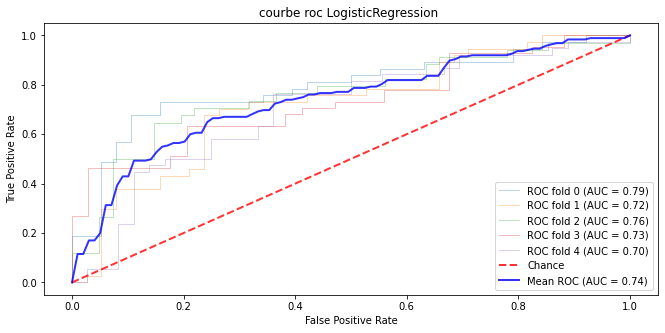

Accuracy: [0.70666667 0.69333333 0.69333333 0.62666667 0.64864865]
moy_accuracy: 0.67
precision: [0.71428571 0.70588235 0.64864865 0.66666667 0.65789474]
moy_precision: 0.68
sensibilité : [0.67567568 0.64864865 0.70588235 0.63414634 0.65789474]
moy_sensibilité: 0.66
spécificité : [0.73684211 0.73684211 0.68292683 0.61764706 0.63888889]
moy_spécificité: 0.68
MCC : [0.4134008  0.38714641 0.38714641 0.2508951  0.29678363]
MCC: 0.35
MCC : [0.4134008  0.38714641 0.38714641 0.2508951  0.29678363]
MCC: 0.35
balanced_accuracy : [0.70625889 0.69274538 0.69440459 0.6258967  0.64839181]
balanced_accuracy: 0.67
roc_auc : [0.78236131 0.70910384 0.75824964 0.73098996 0.69590643]
roc_auc: 0.74
cohen_kappa_scorec : [0.41281139 0.38590246 0.38590246 0.25053533 0.29678363]
cohen_kappa_scorec: 0.35
RandomForestClassifier


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed whe

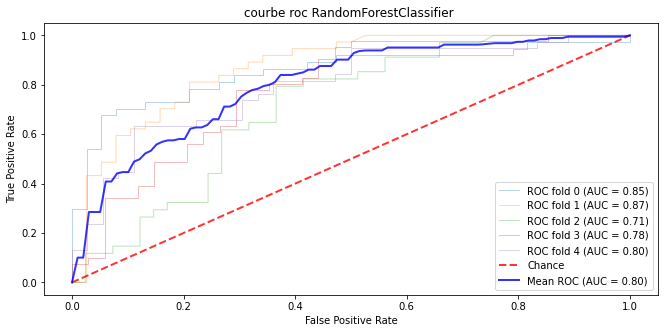

Accuracy: [0.77333333 0.77333333 0.66666667 0.74666667 0.71621622]
moy_accuracy: 0.74
precision: [0.76315789 0.75       0.61538462 0.76190476 0.70731707]
moy_precision: 0.72
sensibilité : [0.78378378 0.81081081 0.70588235 0.7804878  0.76315789]
moy_sensibilité: 0.77
spécificité : [0.76315789 0.73684211 0.63414634 0.70588235 0.66666667]
moy_spécificité: 0.70
MCC : [0.54694168 0.5488252  0.3388156  0.4877718  0.43220061]
MCC: 0.47
MCC : [0.54694168 0.5488252  0.3388156  0.4877718  0.43220061]
MCC: 0.47
balanced_accuracy : [0.77347084 0.77382646 0.67001435 0.74318508 0.71491228]
balanced_accuracy: 0.74
roc_auc : [0.85064011 0.87019915 0.71126255 0.78192253 0.79605263]
roc_auc: 0.80
cohen_kappa_scorec : [0.54674724 0.54706927 0.33581296 0.48759439 0.43076923]
cohen_kappa_scorec: 0.47
GradientBoostingClassifier


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

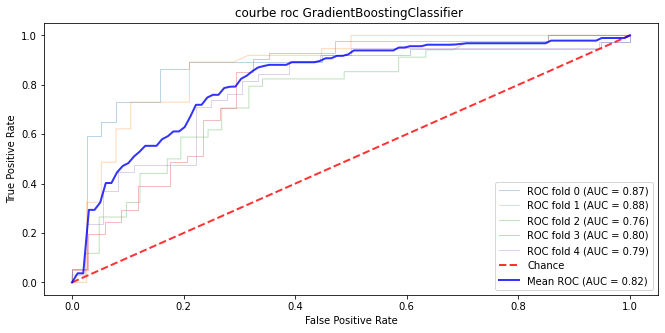

Accuracy: [0.85333333 0.78666667 0.70666667 0.76       0.72972973]
moy_accuracy: 0.77
precision: [0.84210526 0.81818182 0.65789474 0.76744186 0.73684211]
moy_precision: 0.76
sensibilité : [0.86486486 0.72972973 0.73529412 0.80487805 0.73684211]
moy_sensibilité: 0.77
spécificité : [0.84210526 0.84210526 0.68292683 0.70588235 0.72222222]
moy_spécificité: 0.76
MCC : [0.70697013 0.57594601 0.4164324  0.51409028 0.45906433]
MCC: 0.53
MCC : [0.70697013 0.57594601 0.4164324  0.51409028 0.45906433]
MCC: 0.53
balanced_accuracy : [0.85348506 0.7859175  0.70911047 0.7553802  0.72953216]
balanced_accuracy: 0.77
roc_auc : [0.86842105 0.87944523 0.76147776 0.79626973 0.79020468]
roc_auc: 0.82
cohen_kappa_scorec : [0.70671881 0.57264957 0.4140625  0.51333814 0.45906433]
cohen_kappa_scorec: 0.53
GaussianNB


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

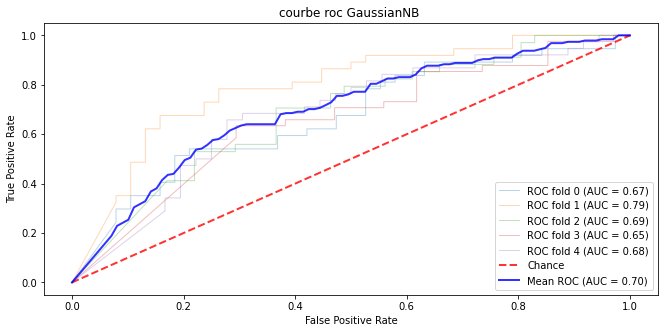

Accuracy: [0.57333333 0.74666667 0.62666667 0.64       0.67567568]
moy_accuracy: 0.65
precision: [0.55555556 0.75       0.56818182 0.625      0.68421053]
moy_precision: 0.64
sensibilité : [0.67567568 0.72972973 0.73529412 0.85365854 0.68421053]
moy_sensibilité: 0.74
spécificité : [0.47368421 0.76315789 0.53658537 0.38235294 0.66666667]
moy_spécificité: 0.56
MCC : [0.15242624 0.49323856 0.2748531  0.27014299 0.35087719]
MCC: 0.31
MCC : [0.15242624 0.49323856 0.2748531  0.27014299 0.35087719]
MCC: 0.31
balanced_accuracy : [0.57467994 0.74644381 0.63593974 0.61800574 0.6754386 ]
balanced_accuracy: 0.65
roc_auc : [0.67105263 0.79374111 0.68723099 0.65351506 0.68274854]
roc_auc: 0.70
cohen_kappa_scorec : [0.14893617 0.49306297 0.26522043 0.24524786 0.35087719]
cohen_kappa_scorec: 0.30
KNeighborsClassifier


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: DataConversionWarning: A column-vector y was passed

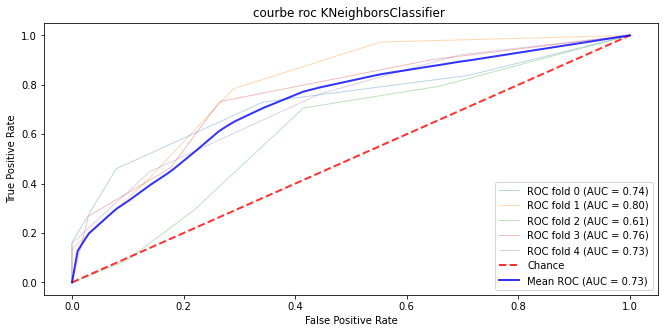

Accuracy: [0.69333333 0.64       0.56       0.62666667 0.64864865]
moy_accuracy: 0.63
precision: [0.85       0.75       0.52631579 0.76       0.77272727]
moy_precision: 0.73
sensibilité : [0.45945946 0.40540541 0.29411765 0.46341463 0.44736842]
moy_sensibilité: 0.41
spécificité : [0.92105263 0.86842105 0.7804878  0.82352941 0.86111111]
moy_spécificité: 0.85
MCC : [0.43019443 0.30957917 0.08539474 0.30302161 0.33733111]
MCC: 0.29
MCC : [0.43019443 0.30957917 0.08539474 0.30302161 0.33733111]
MCC: 0.29
balanced_accuracy : [0.69025605 0.63691323 0.53730273 0.64347202 0.65423977]
balanced_accuracy: 0.63
roc_auc : [0.73577525 0.80192034 0.61441894 0.75860832 0.73099415]
roc_auc: 0.73
cohen_kappa_scorec : [0.38282648 0.27549195 0.07752516 0.27586207 0.30491329]
cohen_kappa_scorec: 0.26


In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import matthews_corrcoef
from sklearn.svm import SVC

classifiers = {
    "XGBClassifier": XGBClassifier(scale_pos_weight=1,learning_rate=0.1),
    "LogisticRegression": LogisticRegression(max_iter=100, solver='lbfgs', class_weight='balanced', random_state=11),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=150, criterion='gini', max_depth=5, random_state=11),
    "GradientBoostingClassifier":GradientBoostingClassifier(n_estimators=225, learning_rate=0.1, max_features=2, max_depth=2, random_state=0,min_samples_leaf=2,subsample=1)
,
    "GaussianNB" : GaussianNB(),
    "KNeighborsClassifier" : KNeighborsClassifier(n_neighbors=4)
}
def tp(y_true, y_pred): 
    error= confusion_matrix(y_true, y_pred)[0,0]/(confusion_matrix(y_true,y_pred)[0,0] + confusion_matrix(y_true, y_pred)[0,1])
    return error

my_scorer = make_scorer(tp, greater_is_better=True)
my_scorer = make_scorer(tp, greater_is_better=True)
def tp1(y_true, y_pred): 
    MCC= matthews_corrcoef(y_true, y_pred)
    return MCC
def tp2(y_true, y_pred): 
    value = cohen_kappa_score(y_true,y_pred)
    return value


my_scorer1 = make_scorer(tp1, greater_is_better=True)
my_scorer2 = make_scorer(tp2, greater_is_better=True)


cv = KFold(n_splits=5, random_state=1, shuffle=True)
for name, clf in classifiers.items():
    print(name)
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(11, 5))
    for i, (train, test) in enumerate(cv.split(var, tar)):
         clf.fit(var.loc[train,], tar.loc[train,])
         viz = plot_roc_curve(clf, var.loc[test,], tar.loc[test,],
                         name='ROC fold {}'.format(i),
                         alpha=0.3, lw=1, ax=ax)
         interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
         interp_tpr[0] = 0.0
         tprs.append(interp_tpr)
         aucs.append(viz.roc_auc)

    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f)' % (mean_auc),
        lw=2, alpha=.8)

    ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="courbe roc %s " %name)
    ax.legend(loc="lower right")
    plt.show()
    # evaluate model
    scores = cross_val_score(clf, var, tar, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = cross_val_score(clf, var, tar, scoring='precision', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(clf, var, tar, scoring='recall', cv=cv, n_jobs=-1)
    scores3 = cross_val_score(clf, var, tar, scoring=my_scorer, cv=cv, n_jobs=-1)
    scores4 = cross_val_score(clf, var, tar, scoring=my_scorer1, cv=cv, n_jobs=-1)
    scores5 = cross_val_score(clf, var, tar, scoring="balanced_accuracy", cv=cv, n_jobs=-1)
    scores6 = cross_val_score(clf, var, tar, scoring="roc_auc", cv=cv, n_jobs=-1)
    scores7 = cross_val_score(clf, var, tar, scoring=my_scorer2, cv=cv, n_jobs=-1)

    # report performance
    print('Accuracy:',scores)
    print('moy_accuracy: %.2f' % mean(scores))
    print('precision:',scores1)
    print('moy_precision: %.2f' % mean(scores1))
    print('sensibilité :',scores2)
    print('moy_sensibilité: %.2f' % mean(scores2))
    print('spécificité :',scores3)
    print('moy_spécificité: %.2f' % mean(scores3))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('MCC :',scores4)
    print('MCC: %.2f' % mean(scores4))
    print('balanced_accuracy :',scores5)
    print('balanced_accuracy: %.2f' % mean(scores5))
    print('roc_auc :',scores6)
    print('roc_auc: %.2f' % mean(scores6))
    print('cohen_kappa_scorec :',scores7)
    print('cohen_kappa_scorec: %.2f' % mean(scores7))